In [1]:
import numpy as np
from PDE3D import PATH
import mitsuba as mi 
mi.set_variant("cuda_ad_rgb")
import os
from PDE3D.utils import *
root_directory = os.path.join(PATH, "output3D", "optimizations")
from PDE3D.BoundaryShape import *
from PDE3D.Coefficient import *
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib
import matplotlib.ticker as ticker
from python3D.optimization.textures import load_boundary_data

In [2]:
DEFAULT_FONTSIZE = 5.2  # Font size used by captions in ACM format
DEFAULT_FONTSIZE_SMALL = 4

MPL_STYLE = {
    "text.usetex": True,
    "text.color": 'black',
    "font.size": DEFAULT_FONTSIZE,
    "axes.titlesize": DEFAULT_FONTSIZE,
    "axes.labelsize": DEFAULT_FONTSIZE_SMALL,
    "xtick.labelsize": DEFAULT_FONTSIZE_SMALL,
    "ytick.labelsize": DEFAULT_FONTSIZE_SMALL,
    "legend.fontsize": DEFAULT_FONTSIZE_SMALL,
    "figure.titlesize": DEFAULT_FONTSIZE,
    "text.latex.preamble": r"""\usepackage{libertine}
                               \usepackage[libertine]{newtxmath}
                               \usepackage{amsmath}
                               \usepackage{amsfonts}
                               \usepackage{bm}
                               \usepackage{bbm}""",
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
    'axes.edgecolor':'black',
    'axes.linewidth': 0.4,
    'xtick.major.size': 0.5,
    'xtick.major.width': 0.5,
    'xtick.minor.size': 0.25,
    'xtick.minor.width': 0.5,

    'ytick.major.size': 0.5,
    'ytick.major.width': 0.5,
    'ytick.minor.size': 0.25,
    'ytick.minor.width': 0.5,

    'lines.linewidth': 0.75,
    'patch.linewidth': 0.5,

    'grid.linewidth': 0.5,
}
matplotlib.rcParams.update(MPL_STYLE)

In [3]:
resolution = [1024, 1024]
bbox=   [[-.91,-.8], [.92,.85]]
cmap_tensor = "viridis"
cmap_boundary = "coolwarm"
cmap_primal_obj = "viridis"
cmap_primal_diff = "coolwarm"
linewidth1 = 1
linewidth2 = 0.5
dist = 0.06
colors = ["black", "darkorange"]
seed = 243
spp = 11
spp_primal = 13

In [4]:
cmap_source = "Greens"
cmap_screening = "Blues"
cmap_diffusion = "Reds"
cmap_boundary = "viridis"
cmap_ref = "viridis"
cmap_diff = "coolwarm"

In [5]:
conf = 1 
parameter = "source"
bias = 0.0
scale=10.0
screen_s1 = 0
folder0 = f"conf{conf}-{parameter}-constDirichlet"
folder1 = f"res16-scale{scale}-bias{bias}-centered-screen{screen_s1}"
folder2 = f"spp{spp_primal}_{spp}-seed{seed}-epsilon0.01"
folder3 = "restensor16"
recordpath = os.path.join(root_directory, folder0, folder1, 
                          folder2, folder3)
max_range_s1 = [bias, bias+scale * 1.1]
s1_paths = {}
s1_paths["npy"] = os.path.join(recordpath, "npy")
s1_paths["primal"] = os.path.join(recordpath, "npy", "primal")
s1_paths["grad"] = os.path.join(recordpath, "npy", "grad")
s1_paths["tensor"] = os.path.join(recordpath, "npy", "tensor")


conf = 2 
parameter = "source"
bias = 0.0
scale=10.0
screen_s2 = 10.0
folder0 = f"conf{conf}-{parameter}-constDirichlet"
folder1 = f"res16-scale{scale}-bias{bias}-centered-screen{screen_s2}"
folder2 = f"spp{spp_primal}_{spp}-seed{seed}-epsilon0.01"
folder3 = "restensor16"
recordpath = os.path.join(root_directory, folder0, folder1, 
                          folder2, folder3)
max_range_s2 = [bias, bias+scale * 1.1]
s2_paths = {}
s2_paths["npy"] = os.path.join(recordpath, "npy")
s2_paths["primal"] = os.path.join(recordpath, "npy", "primal")
s2_paths["grad"] = os.path.join(recordpath, "npy", "grad")
s2_paths["tensor"] = os.path.join(recordpath, "npy", "tensor")


In [6]:
conf = 3
parameter = "screening"
bias = 0.0
scale=20.0
folder0 = f"conf{conf}-{parameter}"
folder1 = f"res16-scale{scale}-bias{bias}-centered"
folder2 = f"spp{spp_primal}_{spp}-seed{seed}-epsilon0.01"
folder3 = "restensor16"
recordpath = os.path.join(root_directory, folder0, folder1, 
                          folder2, folder3)
max_range_sc1 = [bias, bias+scale * 1.1]
sc1_paths = {}
sc1_paths["npy"] = os.path.join(recordpath, "npy")
sc1_paths["primal"] = os.path.join(recordpath, "npy", "primal")
sc1_paths["grad"] = os.path.join(recordpath, "npy", "grad")
sc1_paths["tensor"] = os.path.join(recordpath, "npy", "tensor")

conf = 4
parameter = "screening"
bias = 10.0
scale=20.0
folder0 = f"conf{conf}-{parameter}"
folder1 = f"res16-scale{scale}-bias{bias}-centered"
folder2 = f"spp{spp_primal}_{spp}-seed{seed}-epsilon0.01"
folder3 = "restensor16"
recordpath = os.path.join(root_directory, folder0, folder1, 
                          folder2, folder3)
max_range_sc2 = [bias, bias+scale * 1.1]

sc2_paths = {}
sc2_paths["npy"] = os.path.join(recordpath, "npy")
sc2_paths["primal"] = os.path.join(recordpath, "npy", "primal")
sc2_paths["grad"] = os.path.join(recordpath, "npy", "grad")
sc2_paths["tensor"] = os.path.join(recordpath, "npy", "tensor")


In [7]:
conf = 5
parameter = "diffusion"
bias = 1.0
scale= 10.0
screen_d1 = 0
folder0 = f"conf{conf}-{parameter}"
folder1 = f"res16-scale{scale}-bias{bias}-centered-screen{screen_d1}"
folder2 = f"spp{spp_primal}_{spp}-seed{seed}-epsilon0.01"
folder3 = "restensor16"
recordpath = os.path.join(root_directory, folder0, folder1, 
                          folder2, folder3)
max_range_d1 = [bias, bias+scale * 1.1]
d1_paths = {}
d1_paths["npy"] = os.path.join(recordpath, "npy")
d1_paths["primal"] = os.path.join(recordpath, "npy", "primal")
d1_paths["grad"] = os.path.join(recordpath, "npy", "grad")
d1_paths["tensor"] = os.path.join(recordpath, "npy", "tensor")

conf = 6
parameter = "diffusion"
bias = 1.0
scale=10.0
screen_d2 = 10.0
folder0 = f"conf{conf}-{parameter}"
folder1 = f"res16-scale{scale}-bias{bias}-centered-screen{screen_d2}"
folder2 = f"spp{spp_primal}_{spp}-seed{seed}-epsilon0.01"
folder3 = "restensor16"
recordpath = os.path.join(root_directory, folder0, folder1, 
                          folder2, folder3)
max_range_d2 = [bias, bias+scale * 1.1]
d2_paths = {}
d2_paths["npy"] = os.path.join(recordpath, "npy")
d2_paths["primal"] = os.path.join(recordpath, "npy", "primal")
d2_paths["grad"] = os.path.join(recordpath, "npy", "grad")
d2_paths["tensor"] = os.path.join(recordpath, "npy", "tensor")

In [8]:
name = "motorbike-engine"
dirichlet = load_boundary_data()
folder_name = os.path.join(PATH, "scenes", name)
xml_name = os.path.join(folder_name, "scene.xml")
sdf_data = np.load(os.path.join(folder_name, "sdf.npy")) - 0.0005
boundary = SDF(sdf_data, dirichlet = dirichlet, scale = 12, mesh_scene_xml=xml_name)

In [9]:
def get_best_conf(paths):
    objective = np.load(os.path.join(paths["npy"], f"objectives.npy"))
    primal_begin = np.load(os.path.join(paths["primal"], f"primal-1.npy"))
    diff = np.sum(np.abs(objective - primal_begin), axis = (1,2,3))
    ind = np.argsort(diff)
    return diff[ind], ind

In [10]:
get_best_conf(sc1_paths)

(array([    0.        ,    52.21732205,    54.1745976 ,    54.63390019,
           59.5452631 ,    66.9232292 ,    71.32512024,    73.96706644,
           75.5084867 ,    87.79960422,    95.28595934,    97.42157815,
          108.0353648 ,   108.15814302,   118.98292591,   126.87849155,
          127.30989899,   134.54218452,   185.24315605,   239.82892823,
          250.94966123,   440.84048886,   477.68766709,   558.85102328,
          572.51428554,   757.40304223,   881.21739515,   948.4686039 ,
          972.21494455,   986.64502232,  1030.75036176,  1036.86215186,
         1041.55890233,  1115.86765304,  1160.46897905,  1182.66982227,
         1237.38807642,  1248.07234097,  1248.63355397,  1276.54382974,
         1276.54382974,  1327.12136402,  1477.86959294,  1477.86959294,
         2875.66366293,  3177.41063127,  3215.48830442,  3259.9232352 ,
         3267.11985608,  3268.29604227,  3280.86960049,  3282.99074104,
         3283.60482738,  3296.89482835,  3298.0978736 ,  3304.14

In [11]:
cam_origin = mi.ScalarPoint3f([7.8,7,20])
scale_cam = 0.28
cam_target = mi.ScalarPoint3f([0,-0.1,-0.2])
cam_up = mi.ScalarPoint3f([0,1,0])
cam_res = [1024, 1024]
spp = 256

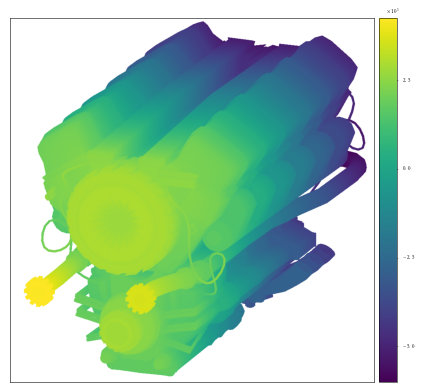

In [12]:
def visualize_boundary(ax, sdf, conf = 4, cmap = "viridis"):
    dirichlet3D, dirichlet_norm = sdf.visualize(colormap = cmap, cam_origin= cam_origin, spp = spp, image_res = cam_res, 
    scale_cam=scale_cam, cam_up = cam_up,cam_target = cam_target, conf_number=conf)
    plot_image_3D(dirichlet3D, ax, norm = dirichlet_norm, cmap = cmap)

fig, ax = plt.subplots(1,1, figsize = (5,5))
visualize_boundary(ax, boundary, 5)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.9134098].


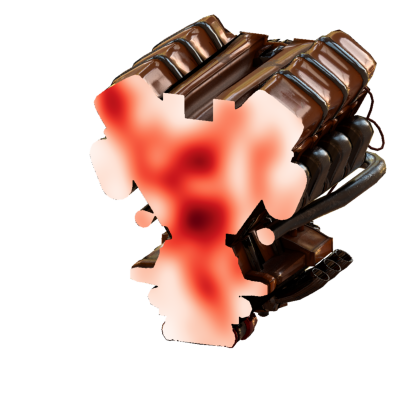

In [13]:
def visualize_tensor(ax, shape, tensor, slice : Slice, nearest = False, cmap = "Reds", input_range = None, delete_left_ratio = 1, sym = False):
    interpolation = "nearest" if nearest else "cubic"
    bbox = boundary.bbox
    bbox_pad = (bbox.max - bbox.min) / 10
    bbox_coeff = mi.ScalarBoundingBox3f(bbox.min - bbox_pad, bbox.max + bbox_pad)

    coeff = TextureCoefficient(name = "coeff", bbox = bbox_coeff, tensor_np = tensor.squeeze(), interpolation=interpolation)
    coeff3D, coeffnorm = shape.visualize(colormap = cmap, cam_origin= cam_origin, spp = spp, image_res = cam_res, 
                                          scale_cam=scale_cam, cam_up = cam_up, slice = slice, cam_target = cam_target, coeff= coeff, input_range = input_range, sym_colorbar = sym)
    ny = coeff3D.shape[1]
    coeff3D = coeff3D[:, int(-delete_left_ratio * ny):, :]
    plot_image_3D(coeff3D, ax, cmap = cmap)
    disable_border(ax)
    disable_ticks(ax)
    return coeffnorm


fig, ax = plt.subplots(1,1, figsize = (5,5))
slice = Slice(offset =0.0, scale = 7, axis = "z")
tensor = np.load(os.path.join(d1_paths["tensor"], "diffusion.texture.tensor-14.npy"))
visualize_tensor(ax, boundary, tensor, slice = slice)

In [14]:
slices = [Slice(offset =1.3, scale = 7, axis = "z"),
          Slice(offset =-2, scale = 7, axis = "z")]
slice = Slice(offset =0.0, scale = 7, axis = "z")

def vis_single_opt(fig, ax, path_dict, iters, cbar_offset, pre_cbar_offset, post_cbar_offset, end_offset, cbar_begin_pad, cbar_end_pad, imsize, imsize_h1, imsize_h2, imsize_h3, hor_pad, conf_boundary, param, 
                   cmap_tensor = "Reds", num_ticks = 3, verbose1 = False, verbose2 = False, tensor_range = [None, None], slices = []):
    title_pad = 6
    num_iter = len(iters)
    num_images = num_iter + 1
    total_cbar_offset = cbar_offset + pre_cbar_offset + post_cbar_offset
    imsize_h = imsize_h1 + imsize_h2
    g = gridspec.GridSpecFromSubplotSpec(imsize, (imsize_h) * num_images + hor_pad * num_iter + (imsize + 3 * imsize_h3) + 4 * total_cbar_offset + end_offset + 1, ax.get_subplotspec(), 
                                         wspace = None, hspace=None)
    iters2 = list(iters)
    iters2.append(-1)
    pad_h = 0
    for i, iter in enumerate(iters2):
        ax1 = fig.add_subplot(g[0 : imsize, pad_h  : pad_h + imsize_h1])
        ax2 = fig.add_subplot(g[0 : imsize, pad_h + imsize_h1 : pad_h + imsize_h])
        pad_h += imsize_h + hor_pad
        if iter == -1:
            #image = record[f"objective-tensor"]
            image = np.load(os.path.join(path_dict["npy"], "objective-tensor.npy"))
        else:
            #image = record[f"{param}.texture.tensor-{iter}"]
            image = np.load(os.path.join(path_dict["tensor"], f"{param}.texture.tensor-{iter}.npy"))
        visualize_tensor(ax1, boundary, image, cmap = cmap_tensor, slice = slices[0], input_range = tensor_range, delete_left_ratio = imsize_h1 / imsize)
        visualize_tensor(ax2, boundary, image, cmap = cmap_tensor, slice = slices[1], input_range = tensor_range, delete_left_ratio = imsize_h2 / imsize)
        #im = visualize_tensor(ax, shape, image, bbox, resolution, colorbar = False, cmap = cmap_tensor, input_range = tensor_range)
        offset_x = 1
        if iter == -1:
            if verbose1:
                ax1.set_title(r"$\textbf{(b)}$ Reference", pad = title_pad, x = offset_x)
        else:
            if verbose1:
                text = f"(a{i+1})"
                t = r"$\textbf{" + text + "}$"
                ax1.set_title(f"{t} Iter. {iter}", pad = title_pad, x = offset_x)
            elif verbose2:
                ax1.set_title(f"Iter. {iter}", pad = 3, x = offset_x)

            
    pad_h -= hor_pad
    ax_cbar_tensor = fig.add_subplot(g[cbar_begin_pad : imsize - cbar_end_pad, pad_h + pre_cbar_offset : pad_h + pre_cbar_offset + cbar_offset])
    norm = mcolors.Normalize(vmin=tensor_range[0], vmax=tensor_range[1])
    cbar_tensor = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap_tensor), cax=ax_cbar_tensor, orientation='vertical')
    tick_locator = ticker.MaxNLocator(nbins=num_ticks)
    cbar_tensor.locator = tick_locator
    cbar_tensor.formatter.set_powerlimits((0, 0))
    #cbar_tensor.ax.yaxis.set_offset_position('left') 
    cbar_tensor.update_ticks()
    pad_h += total_cbar_offset

    #primal_ref = record["objectives"][conf_boundary]
    #primal_begin = record["primals-0"][conf_boundary] - primal_ref
    #primal_end = record[f"primals-{iters[-1]}"][conf_boundary] - primal_ref
    primal_ref = np.load(os.path.join(path_dict["npy"], f"objectives.npy"))[conf_boundary]
    primal_begin = np.load(os.path.join(path_dict["primal"], f"primal-0.npy"))[conf_boundary] - primal_ref
    primal_end = np.load(os.path.join(path_dict["primal"], f"primal-{iters[-1]}.npy"))[conf_boundary] -primal_ref
    
    max_primal = max(np.max(primal_begin), -np.min(primal_begin))
    primal_range = [-max_primal, max_primal]

    ax_boundary = fig.add_subplot(g[0 : imsize, pad_h : pad_h + imsize])
    disable_border(ax_boundary)
    disable_ticks(ax_boundary)
    boundary3D, norm_boundary = boundary.visualize(colormap = cmap_boundary, cam_origin= cam_origin, spp = spp, image_res = cam_res, 
                                                       scale_cam=scale_cam, cam_up = cam_up, cam_target = cam_target, conf_number= conf_boundary)
    plot_image_3D(boundary3D, ax_boundary, cmap = cmap_boundary)
    
    ax_boundary_cbar = fig.add_subplot(g[cbar_begin_pad : imsize - cbar_end_pad, pad_h + imsize + pre_cbar_offset : pad_h + imsize + pre_cbar_offset + cbar_offset])
    cbar_boundary = plt.colorbar(mpl.cm.ScalarMappable(norm=norm_boundary, cmap=cmap_boundary), cax=ax_boundary_cbar, orientation='vertical')
    tick_locator = ticker.MaxNLocator(nbins=num_ticks)
    cbar_boundary.locator = tick_locator
    cbar_boundary.formatter.set_powerlimits((0, 0))
    #cbar_boundary.ax.yaxis.set_offset_position('left') 
    cbar_boundary.update_ticks()
    if verbose1:
        ax_boundary.set_title(r"$\textbf{(c)}$ Boundary cond.", pad = title_pad)

    pad_h += total_cbar_offset + imsize
    
    ax_ref = fig.add_subplot(g[0 : imsize, pad_h : pad_h + imsize_h3])
    ref_norm = visualize_tensor(ax_ref, boundary, primal_ref, slice = slice, cmap = cmap_ref, nearest = True, delete_left_ratio=imsize_h3 / imsize)
    ax_ref_cbar = fig.add_subplot(g[cbar_begin_pad : imsize - cbar_end_pad, pad_h + imsize_h3 + pre_cbar_offset : pad_h + imsize_h3 + pre_cbar_offset + cbar_offset])
    cbar_ref = plt.colorbar(mpl.cm.ScalarMappable(norm=ref_norm, cmap=cmap_ref), cax=ax_ref_cbar, orientation='vertical')
    tick_locator = ticker.MaxNLocator(nbins=num_ticks)
    cbar_ref.locator = tick_locator
    cbar_ref.formatter.set_powerlimits((0, 0))
    #cbar_ref.ax.yaxis.set_offset_position('left') 
    cbar_ref.update_ticks()
    if verbose1:
        ax_ref.set_title(r"$\textbf{(d)}$ $u_{\mathrm{ref}}$", pad = title_pad)

    pad_h += imsize_h3 + total_cbar_offset
    ax_begin = fig.add_subplot(g[0 : imsize, pad_h : pad_h + imsize_h3])
    begin_norm = visualize_tensor(ax_begin, boundary, primal_begin, slice = slice, cmap = cmap_diff, input_range = primal_range,
                                  nearest = True, sym = True, delete_left_ratio=imsize_h3/imsize)

    #ax_begin_cbar = fig.add_subplot(g[cbar_begin_pad : imsize - cbar_end_pad, pad_h + imsize_h3 + pre_cbar_offset : pad_h + imsize_h3 + pre_cbar_offset + cbar_offset])
    #cbar_begin = plt.colorbar(mpl.cm.ScalarMappable(norm=begin_norm, cmap=cmap_diff), cax=ax_begin_cbar, orientation='vertical')
    #tick_locator = ticker.MaxNLocator(nbins=num_ticks)
    #cbar_begin.locator = tick_locator
    #cbar_begin.formatter.set_powerlimits((0, 0))
    #cbar_begin.ax.yaxis.set_offset_position('left') 
    #cbar_begin.update_ticks()


    if verbose1:
        ax_begin.set_title(r"$\textbf{(e1)}$ $\Delta u_0$", pad = title_pad)

    pad_h += imsize_h3
    ax_end = fig.add_subplot(g[0 : imsize, pad_h : pad_h + imsize_h3])
    end_norm = visualize_tensor(ax_end, boundary, primal_end, slice = slice, cmap = cmap_diff, 
                                nearest = True, sym = True, delete_left_ratio=imsize_h3/imsize, input_range = primal_range)

    ax_end_cbar = fig.add_subplot(g[cbar_begin_pad : imsize - cbar_end_pad, pad_h + imsize_h3 + pre_cbar_offset : pad_h + imsize_h3 + pre_cbar_offset + cbar_offset])
    cbar_end = plt.colorbar(mpl.cm.ScalarMappable(norm=begin_norm, cmap=cmap_diff), cax=ax_end_cbar, orientation='vertical')
    tick_locator = ticker.MaxNLocator(nbins=num_ticks)
    cbar_end.locator = tick_locator
    cbar_end.formatter.set_powerlimits((0, 0))
    #cbar_end.ax.yaxis.set_offset_position('left') 
    cbar_end.update_ticks()
    
    if verbose1:
        ax_end.set_title(r"$\textbf{(e2)}$ $\Delta u_{\mathrm{last}}$", pad = title_pad)


    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7171791].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7173128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7171791].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7173127].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7171791].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7173128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7171791].
Clipping input data to the valid r

5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7171791].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7173128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7171791].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7173126].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7171791].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7173128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7171791].
Clipping input data to the valid r

19


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7171791].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7173128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7171791].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7173126].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7171791].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7173128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7171791].
Clipping input data to the valid r

23


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7171791].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7173126].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7171791].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7173126].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7171791].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7173126].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7171791].
Clipping input data to the valid r

37


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7171791].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7173126].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7171791].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7173126].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7171791].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7173126].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.7171791].
Clipping input data to the valid r

'/home/ekrem/repos/MC-PDE3D/figures/opt_coeff_3D/opt_coeff_3D.pdf'

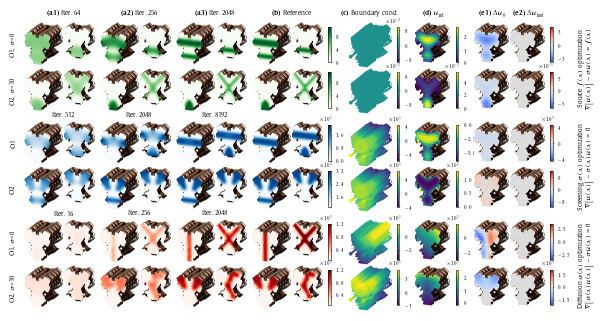

In [15]:
cbar_offset = 2
pre_cbar_offset = 3
post_cbar_offset = 11
total_cbar_offset = cbar_offset + pre_cbar_offset + post_cbar_offset
cbar_begin = 3
cbar_end = 4
imsize = 32
imsize_h1 = 29
imsize_h2 = 22
imsize_h3 = 25
conf_boundary = 0
hor_pad = 2
iters = [2, 4, 16]
num_images = len(iters) + 1

end_offset = 1
group_pad = 5
scale =(num_images * (imsize_h1 + imsize_h2) + hor_pad * (num_images-1) + (imsize + 3 * imsize_h3) + 4 * total_cbar_offset + end_offset) / TEXT_WIDTH
fig = plt.figure(figsize = ((num_images * (imsize_h1 + imsize_h2) + hor_pad * (num_images-1) + (imsize + 3 * imsize_h3) + 4 * total_cbar_offset + end_offset) / scale, 
                            (6 * imsize + 3 * group_pad) / scale))

g = gridspec.GridSpec(6 * imsize + 3 * group_pad, 1, figure = fig, wspace =0, hspace=0)
source_ax = fig.add_subplot(g[0 : 2 * imsize])
screening_ax = fig.add_subplot(g[2 * imsize + group_pad : 4 * imsize + group_pad])
diffusion_ax = fig.add_subplot(g[4 * imsize + 2 * group_pad : 6 * imsize + 2 * group_pad])

eqn_source = r"$\nabla \big[ u(x) \big] - \sigma u(x) = f(x)$"
source_ax.set_ylabel(f"Source $f(x)$ optimization \n {eqn_source}", fontsize = DEFAULT_FONTSIZE)
eqn_screening = r"$\nabla \big[ u(x) \big] - \sigma(x)u(x) = 0$"
screening_ax.set_ylabel(f"Screening $\sigma(x)$ optimization \n {eqn_screening}", fontsize = DEFAULT_FONTSIZE)
eqn_diffusion = r"$\nabla \big[ \alpha(x) u(x) \big] - \sigma u(x) = 0$"
diffusion_ax.set_ylabel(f"Diffusion $\\alpha(x)$ optimization \n {eqn_diffusion}", fontsize = DEFAULT_FONTSIZE)

source_ax.yaxis.set_label_position("right")
screening_ax.yaxis.set_label_position("right")
diffusion_ax.yaxis.set_label_position("right")

disable_border(source_ax)
disable_border(screening_ax)
disable_border(diffusion_ax)
disable_ticks(source_ax)
disable_ticks(screening_ax)
disable_ticks(diffusion_ax)


################## Source #######################################
g_source = gridspec.GridSpecFromSubplotSpec(2 * imsize, 1, source_ax.get_subplotspec(), wspace=0, hspace=0)
conf_boundary = 0
iters = [64, 256, 2048]
source_ax1 = fig.add_subplot(g_source[0 : imsize])
str_s1 = r"O1, $\sigma$"
source_ax1.set_ylabel(f"{str_s1}={int(screen_s1)}", fontsize = DEFAULT_FONTSIZE)
disable_border(source_ax1)
disable_ticks(source_ax1)
vis_single_opt(fig, source_ax1, s1_paths, iters, cbar_offset, pre_cbar_offset, post_cbar_offset, end_offset, cbar_begin, cbar_end, imsize, imsize_h1, imsize_h2, imsize_h3, hor_pad,
               conf_boundary, "source", verbose1 = True, tensor_range = max_range_s1, cmap_tensor = cmap_source, slices = slices)

source_ax2 = fig.add_subplot(g_source[imsize : 2 * imsize])
str_s2 = r"O2, $\sigma$"
source_ax2.set_ylabel(f"{str_s2}={int(screen_s2)}", fontsize = DEFAULT_FONTSIZE)
disable_border(source_ax2)
disable_ticks(source_ax2)
vis_single_opt(fig, source_ax2, s2_paths, iters, cbar_offset, pre_cbar_offset, post_cbar_offset, end_offset, cbar_begin, cbar_end, imsize, imsize_h1, imsize_h2, imsize_h3, hor_pad,
               conf_boundary, "source", tensor_range = max_range_s2, cmap_tensor = cmap_source, slices = slices)


################## Screening #######################################
g_screen = gridspec.GridSpecFromSubplotSpec(2 * imsize, 1, screening_ax.get_subplotspec(), wspace=0, hspace=0)

iters = [512, 2048, 8192]
screen_ax1 = fig.add_subplot(g_screen[0 : 1 * imsize])
screen_ax1.set_ylabel(r"O1", fontsize = DEFAULT_FONTSIZE)
disable_border(screen_ax1)
disable_ticks(screen_ax1)

diff_in, ind = get_best_conf(sc1_paths)
conf_boundary = ind[-1]
print(conf_boundary)
vis_single_opt(fig, screen_ax1, sc1_paths, iters, cbar_offset, pre_cbar_offset, post_cbar_offset,end_offset, cbar_begin, cbar_end, imsize, imsize_h1, imsize_h2, imsize_h3, hor_pad, 
               conf_boundary, "screening", verbose2 = True, tensor_range = max_range_sc1, cmap_tensor = cmap_screening, slices = slices)

screen_ax2 = fig.add_subplot(g_screen[imsize : 2 * imsize])
screen_ax2.set_ylabel(r"O2", fontsize = DEFAULT_FONTSIZE)
disable_border(screen_ax2)
disable_ticks(screen_ax2)
diff_in, ind = get_best_conf(sc2_paths)
conf_boundary = ind[-1]
print(conf_boundary)
vis_single_opt(fig, screen_ax2, sc2_paths, iters, cbar_offset, pre_cbar_offset, post_cbar_offset,end_offset, cbar_begin, cbar_end, imsize, imsize_h1, imsize_h2, imsize_h3, hor_pad,
               conf_boundary, "screening", tensor_range = max_range_sc2, cmap_tensor = cmap_screening, slices = slices)


################## Diffusion #######################################
#conf_boundary = 16
g_diffusion = gridspec.GridSpecFromSubplotSpec(2 * imsize, 1, diffusion_ax.get_subplotspec(), wspace=0, hspace=0)

iters = [16, 256, 2048]
diffusion_ax1 = fig.add_subplot(g_diffusion[0 : imsize])
str_d1 = r"O1, $\sigma$"
diffusion_ax1.set_ylabel(f"{str_d1}={int(screen_d1)}", fontsize = DEFAULT_FONTSIZE)
disable_border(diffusion_ax1)
disable_ticks(diffusion_ax1)
diff_in, ind = get_best_conf(d1_paths)
conf_boundary = ind[-1]
print(conf_boundary)
vis_single_opt(fig, diffusion_ax1, d1_paths, iters, cbar_offset, pre_cbar_offset, post_cbar_offset,end_offset, cbar_begin, cbar_end, imsize, imsize_h1, imsize_h2, imsize_h3, hor_pad,
               conf_boundary, "diffusion", verbose2 = True, tensor_range = max_range_d1, cmap_tensor = cmap_diffusion, slices = slices)

diffusion_ax2 = fig.add_subplot(g_diffusion[imsize : 2 * imsize])
str_d2 = r"O2, $\sigma$"
diffusion_ax2.set_ylabel(f"{str_d2}={int(screen_d2)}", fontsize = DEFAULT_FONTSIZE)
disable_border(diffusion_ax2)
disable_ticks(diffusion_ax2)
diff_in, ind = get_best_conf(d2_paths)
conf_boundary = ind[-1]
print(conf_boundary)
vis_single_opt(fig, diffusion_ax2, d2_paths, iters, cbar_offset, pre_cbar_offset, post_cbar_offset,end_offset, cbar_begin, cbar_end, imsize, imsize_h1, imsize_h2, imsize_h3, hor_pad,
               conf_boundary, "diffusion", tensor_range = max_range_d2, cmap_tensor = cmap_diffusion, slices = slices)


plt.savefig(os.path.join(PATH, "figures", "png", "opt_coeff_3D.png"), bbox_inches='tight', pad_inches=0.04, dpi=1000)
save_fig("opt_coeff_3D", os.path.join(PATH, "figures"))
#plt.savefig("opt_coeff_3D.pdf", bbox_inches='tight', pad_inches=0.04, dpi=300)